In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pickle
from jax import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 5))

# load data from ../results/eval_err_pos_mppi_N${N}_H40.pkl
all_data = pd.DataFrame(
    columns=['N', 'error']
)

for N in [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]:
    with open(f'../../results/eval_err_pos_mppi_N{N}_H40.pkl', 'rb') as f:
        data = pickle.load(f) # data is a list of 1000 arrays
        data = np.array(data).flatten()
    # append N and error to all_data
    all_data = pd.concat(
        [
            all_data,
            pd.DataFrame(
                {
                    'N': [f'N{N} \n mu:{np.mean(data):.2f} \n std:{np.std(data):.2f}']*len(data),
                    'error': data,
                }
            )
        ]
    )

sns.violinplot(x='N', y='error', data=all_data, ax=ax)
ax.set_xlabel('N')
ax.set_ylabel('error')

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 5))

# load data from ../results/eval_err_pos_mppi_N${N}_H40.pkl
all_data = pd.DataFrame(
    columns=['H', 'error']
)

for H in [2, 4, 8, 16, 32, 64, 128]:
    with open(f'../../results/eval_err_pos_mppi_N128_H{H}.pkl', 'rb') as f:
        data = pickle.load(f) # data is a list of 1000 arrays
        data = np.array(data).flatten()
    # append N and error to all_data
    all_data = pd.concat(
        [
            all_data,
            pd.DataFrame(
                {
                    'H': [f'H{H} \n mu:{np.mean(data):.2f} \n std:{np.std(data):.2f}']*len(data),
                    'error': data,
                }
            )
        ]
    )

sns.violinplot(x='H', y='error', data=all_data, ax=ax)
ax.set_xlabel('H')
ax.set_ylabel('error')

/tmp/ipykernel_354586/2765938479.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat(


start plotting...


/home/pcy/mambaforge/envs/jax/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcy/mambaforge/envs/jax/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcy/mambaforge/envs/jax/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


done


Text(0, 0.5, 'error')

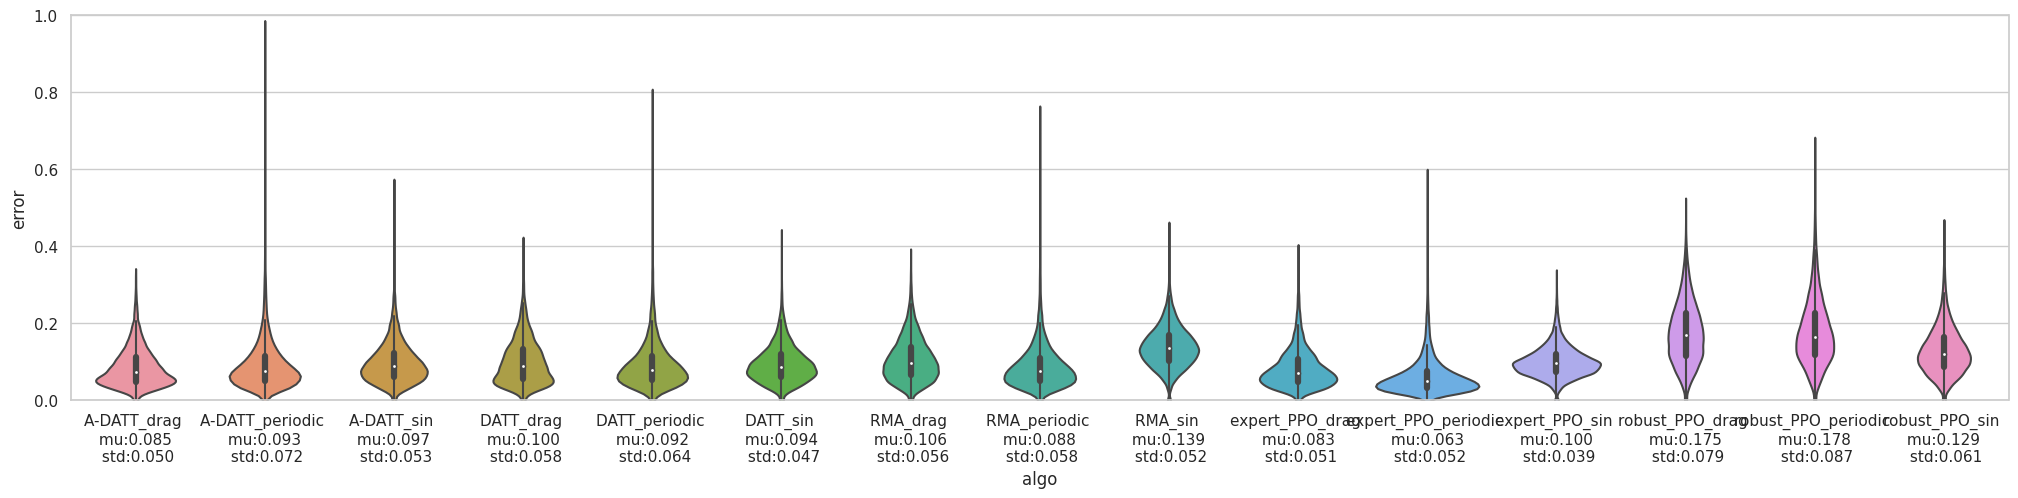

In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pickle
from jax import numpy as np
import seaborn as sns
import pandas as pd

# find all .pkl file in ../../results/init/
os.chdir('../../results/rma/')
files = os.listdir()
files = [f for f in files if f.endswith('.pkl')]
files = [f for f in files if f.startswith('eval_err_pos')]
files = [f for f in files if 'DR' not in f]
files = [f for f in files if (('periodic' in f) or ('sin' in f) or ('drag' in f))]
# files = [f for f in files if (('drag' in f))]

# sort files by name
files.sort()

# load all files
all_data = pd.DataFrame(
    columns=['algo', 'error', 'mean', 'std']
)

for file in files:
    file_name = file.split(".")[0]
    exp_name = file_name[13:]
    with open(file, 'rb') as f:
        data = pickle.load(f)
    data = np.array(data).flatten()
    # append N and error to all_data
    all_data = pd.concat(
        [
            all_data,
            pd.DataFrame(
                {
                    'algo': [f'{exp_name} \n mu:{np.mean(data):.3f} \n std:{np.std(data):.3f}']*len(data),
                    'error': data,
                    'mean': [np.mean(data)]*len(data),
                    'std': [np.std(data)]*len(data),
                }
            )
        ]
    )

# plot in a order from largest mean to smallest mean
# all_data = all_data.sort_values(by=['mean'], ascending=False)
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30, 5))
print('start plotting...')
sns.violinplot(x='algo', y='error', data=all_data, ax=ax)
# plot with y limit from 0 to 1
ax.set_ylim(0, 1)
print('done')
ax.set_xlabel('algo')
ax.set_ylabel('error')